In [2]:
# Grayscale has their infrastructure set up to block direct downloads of
# fresh data from python scripts, so without trying to find a workaround
# the easiest way to update stale data is just to go to the linked page
# below and download the latest data. 

# https://grayscale.com/wp-content/uploads/market-data/btc.csv

In [3]:
# Author: T. from Data Always. 
# Twitter: @Data_Always
# Substack: dataalways.substack.com
 
# Last modified: June 24, 2022
# Last data update: June 23, 2022

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Default plot settings 
def set_plt_defaults():
    plt.rcParams['figure.figsize'] = (14, 8)
    # Default figure size.

    plt.rcParams['figure.subplot.left'] = 0.05
    plt.rcParams['figure.subplot.top'] = 0.92
    plt.rcParams['figure.subplot.right'] = 0.95
    plt.rcParams['figure.subplot.bottom'] = 0.08
    # Position the chart in the figure
        
    fig_out = plt.figure()
    ax_out = plt.subplot2grid((1,1), (0,0))
    # Assign the outputs to return.
            
    plt.grid(color=[0.25]*3, 
             linestyle='-', 
             linewidth=0.75, 
             alpha=0.25, 
             zorder=0
            )
    # Gridline styling

    ax_out.xaxis.grid()
    # Only plot horizontal gridlines.

    return fig_out, ax_out

In [5]:
## Data import and handling. 

df = pd.read_csv('./btc.csv')
# Import the data from the .csv file

df = df[['Date', 'Holdings/Share', 'Market Price/Share']]
# Drop all the columns other than date, holdings, and market price.

df['Premium'] = df['Market Price/Share'] / df['Holdings/Share'] - 1
# Calculate the premium/discount for each day

df = df.sort_values(by="Date")
# Sort the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 815 entries, 814 to 0
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                815 non-null    object 
 1   Holdings/Share      815 non-null    float64
 2   Market Price/Share  815 non-null    float64
 3   Premium             815 non-null    float64
dtypes: float64(3), object(1)
memory usage: 31.8+ KB


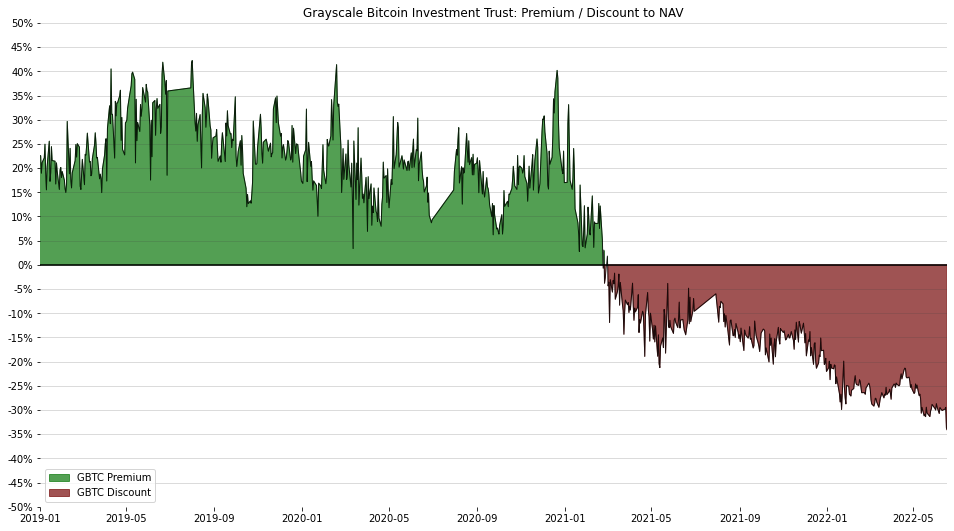

In [7]:
# We're not doing any real data processing in this script, so we can
# jump right into plotting values.

fig, ax1 = set_plt_defaults()
plt.title('Grayscale Bitcoin Investment Trust: Premium / Discount to NAV')

ax1.plot([pd.to_datetime(x) for x in df['Date']], 
          df['Premium'], 
          ls = '-', 
          lw = 1, 
          alpha=0.8, 
          color='k', 
          )
# Plot the outline of the filled areas

ax1.fill_between([pd.to_datetime(x) for x in df['Date']], 
                  df['Premium'],
                  where = df['Premium'] > 0,
                  alpha = 0.75, 
                  color = [0.1, 0.5, 0.1], 
                  label = 'GBTC Premium')
# Plot times with a positive NAV difference in green


ax1.fill_between([pd.to_datetime(x) for x in df['Date']], 
                  df['Premium'],
                  where = df['Premium'] < 0,
                  alpha = 0.75, 
                  color = [0.5, 0.1, 0.1], 
                  label = 'GBTC Discount')
# Plot times with a negative NAV difference in red


ax1.axhline(y=0, color='k', ls='-')
# Draw the x-axis

ax1.set_yticks(np.arange(-1, 1, 0.05))
# Set axis ticks at 5% intervals

ax1.set_yticklabels(['{:,.0%}'.format(x) for x in ax1.get_yticks()])
# Display the tick labels as percentages

ax1.set_ylim([-0.5, 0.5])
# Set the y-plot boundaries

xi = pd.to_datetime('2019-01-01')
xf = pd.to_datetime(df['Date'][0])
ax1.set_xlim([xi, xf])
# Set the x-plot boundaries
# The data is reversed so the xi/xf are the opposite
# of what I would normally expect

ax1.legend(loc='lower left')
# Create a legend for the plot

plt.box(False)
# No grid outline

plt.savefig('./gbtc-discount.png', 
            transparent=False, 
            facecolor='white')
# Save the figure in the working directory

plt.show()